In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import csv

In [2]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.ParserWarning)


In [3]:
path_d1 = "dataset1_280126.csv"
path_d3 = "dataset3.csv"

In [4]:
d1 = pd.read_csv(path_d1)

In [5]:
d1.head()

,pseudoid,weightNet,vacuumed,quantum,quantumUnit,geometry,height,density,massInJar,massInJarTare,...,totalVaporizationAmount,totalVaporizationVolume,ashWeightNet,amountToAshing,ashConcentration,SrCarrierConcentration,SrCarrierVolume,sievedOrganicWeight,sievedRocksWeight,sievedDryWeight
0,51055,NaN,0,29093.1,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52642,NaN,0,5441.8,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60026,NaN,0,28689.6,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61469,NaN,0,5569.4,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77085,NaN,0,1.0,m^2,g-3,1.0,0.12,0.17,11.3096,...,33320.0,NaN,NaN,NaN,NaN,1.0,2.5,NaN,NaN,NaN


In [6]:
d3 = pd.read_csv(
        path_d3,
        engine="python",
        sep=None,            
        encoding="utf-8",
        on_bad_lines="warn"  
    )

print("Loaded with python engine, sep auto detected.")

Loaded with python engine, sep auto detected.


In [7]:
d3.head()

,50001,K-40,1121.5664549703706,Bq/kg kp,4.1 %,gamma
0,50001,Pb-210,88.54319706216569,Bq/kg kp,14.0 %,gamma
1,50001,Bi-214,50.78390397259847,Bq/kg kp,5.1 %,gamma
2,50001,Pb-214,51.06821236564313,Bq/kg kp,5.0 %,gamma
3,50001,Cs-137,0.409496306079783,Bq/kg kp,19.0 %,gamma
4,50002,Sr-90,0.025147183705615698,Bq/kg tp,7.1 %,


In [8]:
d1.shape

(22154, 23)

In [9]:
d3.shape

(98095, 6)

In [10]:
# Standardize column names
def clean_cols(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (
        df.columns.astype(str)
        .str.strip()
        .str.lower()
        .str.replace(" ", "", regex=False)
    )
    return df

In [11]:
d1 = clean_cols(d1)
d3 = clean_cols(d3)

In [12]:
d1

,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,totalvaporizationamount,totalvaporizationvolume,ashweightnet,amounttoashing,ashconcentration,srcarrierconcentration,srcarriervolume,sievedorganicweight,sievedrocksweight,sieveddryweight
0,51055,NaN,0,29093.10000,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52642,NaN,0,5441.80000,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60026,NaN,0,28689.60000,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61469,NaN,0,5569.40000,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77085,NaN,0,1.00000,m^2,g-3,1.0,0.12,0.17,11.3096,...,33320.0,NaN,NaN,NaN,NaN,1.0,2.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22149,50724,NaN,0,0.06262,kg,g-2,26.0,0.56,62.62,26.8600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22150,62115,NaN,0,24328.10000,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22151,77495,NaN,0,2407.20000,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22152,59089,NaN,0,29487.50000,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Standardize the key column name so it is exactly pseudoid in both.
def standardize_pseudoid(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # common variations
    candidates = ["pseudoid", "pseudo_id", "pseudoid#", "id", "sampleid", "sample_id"]
    found = None
    for c in candidates:
        if c in df.columns:
            found = c
            break
    if found is None:
        # try fuzzy by substring
        for c in df.columns:
            if "pseudo" in c and "id" in c:
                found = c
                break
    if found is None:
        raise ValueError(f"Could not find pseudoid column in columns: {list(df.columns)[:30]} ...")
    if found != "pseudoid":
        df = df.rename(columns={found: "pseudoid"})
    df["pseudoid"] = df["pseudoid"].astype(str).str.strip()
    return df

In [14]:
d1 = standardize_pseudoid(d1)

In [15]:
d1.shape

(22154, 23)

In [16]:
d1.head()

,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,totalvaporizationamount,totalvaporizationvolume,ashweightnet,amounttoashing,ashconcentration,srcarrierconcentration,srcarriervolume,sievedorganicweight,sievedrocksweight,sieveddryweight
0,51055,NaN,0,29093.1,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52642,NaN,0,5441.8,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60026,NaN,0,28689.6,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61469,NaN,0,5569.4,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77085,NaN,0,1.0,m^2,g-3,1.0,0.12,0.17,11.3096,...,33320.0,NaN,NaN,NaN,NaN,1.0,2.5,NaN,NaN,NaN


In [17]:
d3.head()

,50001,k-40,1121.5664549703706,bq/kgkp,4.1%,gamma
0,50001,Pb-210,88.54319706216569,Bq/kg kp,14.0 %,gamma
1,50001,Bi-214,50.78390397259847,Bq/kg kp,5.1 %,gamma
2,50001,Pb-214,51.06821236564313,Bq/kg kp,5.0 %,gamma
3,50001,Cs-137,0.409496306079783,Bq/kg kp,19.0 %,gamma
4,50002,Sr-90,0.025147183705615698,Bq/kg tp,7.1 %,


In [18]:
d3 = d3.iloc[:, :6]
d3.columns = ["pseudoid", "nuclide", "result", "quantum_unit", "uncertainty", "method"]

# Clean column names and standardize id name
d3.columns = (
    d3.columns.astype(str)
    .str.strip()
    .str.lower()
    .str.replace(" ", "", regex=False)
)


In [19]:
d3["pseudoid"] = d3["pseudoid"].astype(str).str.strip()

In [20]:
d3 = standardize_pseudoid(d3)


In [21]:
d3.head()

,pseudoid,nuclide,result,quantum_unit,uncertainty,method
0,50001,Pb-210,88.54319706216569,Bq/kg kp,14.0 %,gamma
1,50001,Bi-214,50.78390397259847,Bq/kg kp,5.1 %,gamma
2,50001,Pb-214,51.06821236564313,Bq/kg kp,5.0 %,gamma
3,50001,Cs-137,0.409496306079783,Bq/kg kp,19.0 %,gamma
4,50002,Sr-90,0.025147183705615698,Bq/kg tp,7.1 %,


In [22]:
for col in d1.columns:
    if col == "pseudoid":
        continue
    d1[col] = pd.to_numeric(d1[col], errors="ignore")

/var/folders/zc/2tfcymgx7tdbmn9w3ld9_hgh0000gn/T/ipykernel_40198/1719906563.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  d1[col] = pd.to_numeric(d1[col], errors="ignore")


In [23]:
d1.head()

,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,totalvaporizationamount,totalvaporizationvolume,ashweightnet,amounttoashing,ashconcentration,srcarrierconcentration,srcarriervolume,sievedorganicweight,sievedrocksweight,sieveddryweight
0,51055,NaN,0,29093.1,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52642,NaN,0,5441.8,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60026,NaN,0,28689.6,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61469,NaN,0,5569.4,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77085,NaN,0,1.0,m^2,g-3,1.0,0.12,0.17,11.3096,...,33320.0,NaN,NaN,NaN,NaN,1.0,2.5,NaN,NaN,NaN


In [24]:
# Ensure pseudoid is clean string
d3["pseudoid"] = d3["pseudoid"].astype(str).str.strip()

# Convert result to numeric
d3["result"] = pd.to_numeric(d3["result"], errors="coerce")

# Clean uncertainty: remove % and convert to float
d3["uncertainty"] = (
    d3["uncertainty"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)

d3["uncertainty"] = pd.to_numeric(d3["uncertainty"], errors="coerce")

# Clean method column (optional but good practice)
d3["method"] = d3["method"].astype(str).str.strip()
d3.loc[d3["method"].isin(["", "nan", "None"]), "method"] = np.nan




In [25]:
d3.head()

,pseudoid,nuclide,result,quantum_unit,uncertainty,method
0,50001,Pb-210,88.543197,Bq/kg kp,14.0,gamma
1,50001,Bi-214,50.783904,Bq/kg kp,5.1,gamma
2,50001,Pb-214,51.068212,Bq/kg kp,5.0,gamma
3,50001,Cs-137,0.409496,Bq/kg kp,19.0,gamma
4,50002,Sr-90,0.025147,Bq/kg tp,7.1,NaN


In [26]:
print(d3.dtypes)


pseudoid         object
nuclide          object
result          float64
quantum_unit     object
uncertainty     float64
method           object
dtype: object


In [27]:
print(d1.dtypes)

pseudoid                    object
weightnet                  float64
vacuumed                     int64
quantum                    float64
quantumunit                 object
geometry                    object
height                     float64
density                    float64
massinjar                  float64
massinjartare              float64
massinjargross             float64
dryweightnet               float64
dryweightpercent           float64
totalvaporizationamount    float64
totalvaporizationvolume    float64
ashweightnet               float64
amounttoashing             float64
ashconcentration           float64
srcarrierconcentration     float64
srcarriervolume            float64
sievedorganicweight        float64
sievedrocksweight          float64
sieveddryweight            float64
dtype: object


In [28]:
print("Dataset 1 shape:", d1.shape)
print("Dataset 1 columns:", list(d1.columns))
print()
print("Dataset 3 shape:", d3.shape)
print("Dataset 3 columns:", list(d3.columns))

Dataset 1 shape: (22154, 23)
Dataset 1 columns: ['pseudoid', 'weightnet', 'vacuumed', 'quantum', 'quantumunit', 'geometry', 'height', 'density', 'massinjar', 'massinjartare', 'massinjargross', 'dryweightnet', 'dryweightpercent', 'totalvaporizationamount', 'totalvaporizationvolume', 'ashweightnet', 'amounttoashing', 'ashconcentration', 'srcarrierconcentration', 'srcarriervolume', 'sievedorganicweight', 'sievedrocksweight', 'sieveddryweight']

Dataset 3 shape: (98095, 6)
Dataset 3 columns: ['pseudoid', 'nuclide', 'result', 'quantum_unit', 'uncertainty', 'method']


In [29]:
display(d1.head(5))
display(d3.head(5))

,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,totalvaporizationamount,totalvaporizationvolume,ashweightnet,amounttoashing,ashconcentration,srcarrierconcentration,srcarriervolume,sievedorganicweight,sievedrocksweight,sieveddryweight
0,51055,NaN,0,29093.1,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52642,NaN,0,5441.8,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60026,NaN,0,28689.6,m^3,g-3,3.0,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61469,NaN,0,5569.4,m^3,g-7,0.0,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77085,NaN,0,1.0,m^2,g-3,1.0,0.12,0.17,11.3096,...,33320.0,NaN,NaN,NaN,NaN,1.0,2.5,NaN,NaN,NaN


,pseudoid,nuclide,result,quantum_unit,uncertainty,method
0,50001,Pb-210,88.543197,Bq/kg kp,14.0,gamma
1,50001,Bi-214,50.783904,Bq/kg kp,5.1,gamma
2,50001,Pb-214,51.068212,Bq/kg kp,5.0,gamma
3,50001,Cs-137,0.409496,Bq/kg kp,19.0,gamma
4,50002,Sr-90,0.025147,Bq/kg tp,7.1,NaN


In [30]:
# ---------- Helper: missingness summary ----------
def missing_report(df, name="df", top_n=30):
    miss = df.isna().mean().sort_values(ascending=False)
    out = pd.DataFrame({
        "missing_pct": (miss * 100).round(2),
        "missing_count": df.isna().sum(),
        "dtype": df.dtypes.astype(str)
    })
    print(f"\n{name} missingness (top {top_n}):")
    display(out.head(top_n))
    return out


In [31]:
missing_report(d1)


df missingness (top 30):


,missing_pct,missing_count,dtype
amounttoashing,98.98,21929,float64
ashconcentration,99.04,21941,float64
ashweightnet,94.85,21013,float64
density,10.78,2388,float64
dryweightnet,76.12,16864,float64
dryweightpercent,82.47,18270,float64
geometry,10.60,2348,object
height,10.60,2348,float64
massinjar,43.79,9701,float64
massinjargross,44.08,9766,float64


,missing_pct,missing_count,dtype
amounttoashing,98.98,21929,float64
ashconcentration,99.04,21941,float64
ashweightnet,94.85,21013,float64
density,10.78,2388,float64
dryweightnet,76.12,16864,float64
dryweightpercent,82.47,18270,float64
geometry,10.60,2348,object
height,10.60,2348,float64
massinjar,43.79,9701,float64
massinjargross,44.08,9766,float64


In [32]:
missing_report(d3)


df missingness (top 30):


,missing_pct,missing_count,dtype
method,35.34,34662,object
nuclide,0.04,37,object
pseudoid,0.00,0,object
quantum_unit,0.89,873,object
result,38.54,37810,float64
uncertainty,36.71,36012,float64


,missing_pct,missing_count,dtype
method,35.34,34662,object
nuclide,0.04,37,object
pseudoid,0.00,0,object
quantum_unit,0.89,873,object
result,38.54,37810,float64
uncertainty,36.71,36012,float64


In [33]:
import numpy as np

# Make sure numeric columns are numeric
numeric_cols = [
    "weightnet", "density", "massinjar", "massinjartare",
    "massinjargross", "dryweightnet", "dryweightpercent",
    "ashweightnet"
]

for col in numeric_cols:
    if col in d1.columns:
        d1[col] = pd.to_numeric(d1[col], errors="coerce")

# -------- Rule 1: Negative weights or mass ----------
mass_cols = [
    "weightnet", "massinjar", "massinjartare",
    "massinjargross", "dryweightnet", "ashweightnet"
]

for col in mass_cols:
    if col in d1.columns:
        d1[f"rule_negative_{col}"] = d1[col] < 0

# -------- Rule 2: Gross ≠ Tare + Net (within tolerance) ----------
if all(c in d1.columns for c in ["massinjargross", "massinjartare", "massinjar"]):
    tolerance = 0.01  # adjust if needed
    expected = d1["massinjartare"] + d1["massinjar"]
    d1["rule_mass_balance_error"] = (
        np.abs(d1["massinjargross"] - expected) > tolerance
    )

# -------- Rule 3: Dry weight greater than original weight ----------
if all(c in d1.columns for c in ["dryweightnet", "weightnet"]):
    d1["rule_dry_gt_original"] = d1["dryweightnet"] > d1["weightnet"]

# -------- Rule 4: Percent outside 0–100 ----------
if "dryweightpercent" in d1.columns:
    d1["rule_invalid_percent"] = (
        (d1["dryweightpercent"] < 0) |
        (d1["dryweightpercent"] > 100)
    )

# -------- Rule 5: Density unrealistic ----------
if "density" in d1.columns:
    d1["rule_density_unrealistic"] = (
        (d1["density"] <= 0) |
        (d1["density"] > 20)   # upper bound adjustable
    )

# -------- Combine all rules ----------
rule_cols = [c for c in d1.columns if c.startswith("rule_")]

d1["probably_erroneous"] = d1[rule_cols].any(axis=1)

# Show summary
print("Total rows flagged as probably erroneous:", d1["probably_erroneous"].sum())
print("Percentage flagged:", round(100 * d1["probably_erroneous"].mean(), 2), "%")

d1[d1["probably_erroneous"]].head()


Total rows flagged as probably erroneous: 38
Percentage flagged: 0.17 %


,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,rule_negative_massinjar,rule_negative_massinjartare,rule_negative_massinjargross,rule_negative_dryweightnet,rule_negative_ashweightnet,rule_mass_balance_error,rule_dry_gt_original,rule_invalid_percent,rule_density_unrealistic,probably_erroneous
273,75095,NaN,0,0.53096,kg,g-1,1.0,0.0,530.96,132.74,...,False,False,False,False,False,False,False,False,True,True
274,56427,NaN,0,0.52538,kg,g-1,1.0,0.0,525.38,133.42,...,False,False,False,False,False,False,False,False,True,True
360,72900,NaN,0,0.54130,kg,g-1,1.0,0.0,NaN,NaN,...,False,False,False,False,False,False,False,False,True,True
361,51593,NaN,0,0.53450,kg,g-1,1.0,0.0,NaN,NaN,...,False,False,False,False,False,False,False,False,True,True
362,50993,NaN,0,0.54370,kg,g-1,1.0,0.0,NaN,NaN,...,False,False,False,False,False,False,False,False,True,True


In [34]:
d1_clean = d1[~d1["probably_erroneous"]]


In [35]:
d1_clean.head()

,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,rule_negative_massinjar,rule_negative_massinjartare,rule_negative_massinjargross,rule_negative_dryweightnet,rule_negative_ashweightnet,rule_mass_balance_error,rule_dry_gt_original,rule_invalid_percent,rule_density_unrealistic,probably_erroneous
0,51055,NaN,0,29093.1,m^3,g-3,3.0,0.70,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,52642,NaN,0,5441.8,m^3,g-7,0.0,1.00,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,60026,NaN,0,28689.6,m^3,g-3,3.0,0.70,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,61469,NaN,0,5569.4,m^3,g-7,0.0,1.00,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,77085,NaN,0,1.0,m^2,g-3,1.0,0.12,0.17,11.3096,...,False,False,False,False,False,False,False,False,False,False


In [36]:
import numpy as np

# Ensure numeric
d3["result"] = pd.to_numeric(d3["result"], errors="coerce")
d3["uncertainty"] = pd.to_numeric(d3["uncertainty"], errors="coerce")

# -------- Rule 1: Negative result ----------
d3["rule_negative_result"] = d3["result"] < 0

# -------- Rule 2: Negative uncertainty ----------
d3["rule_negative_uncertainty"] = d3["uncertainty"] < 0

# -------- Rule 3: Extremely high uncertainty (>100%) ----------
d3["rule_uncertainty_gt_100"] = d3["uncertainty"] > 100

# -------- Rule 4: Missing result ----------
d3["rule_missing_result"] = d3["result"].isna()

# -------- Rule 5: Missing nuclide ----------
d3["rule_missing_nuclide"] = d3["nuclide"].isna()

# -------- Rule 6: Physically unrealistic large result ----------
# Adjust threshold depending on domain knowledge
d3["rule_extreme_result"] = d3["result"] > 1e7

# -------- Combine all rules ----------
rule_cols_d3 = [c for c in d3.columns if c.startswith("rule_")]

d3["probably_erroneous"] = d3[rule_cols_d3].any(axis=1)

# Summary
print("Total flagged in Dataset 3:", d3["probably_erroneous"].sum())
print("Percentage flagged:", round(100 * d3["probably_erroneous"].mean(), 2), "%")

d3[d3["probably_erroneous"]].head()


Total flagged in Dataset 3: 38096
Percentage flagged: 38.84 %


,pseudoid,nuclide,result,quantum_unit,uncertainty,method,rule_negative_result,rule_negative_uncertainty,rule_uncertainty_gt_100,rule_missing_result,rule_missing_nuclide,rule_extreme_result,probably_erroneous
11,50005,I-131,NaN,Bq/m^3,NaN,gamma,False,False,False,True,False,False,True
25,50009,Kokonaisalfa,NaN,Bq/l,NaN,NaN,False,False,False,True,False,False,True
26,50009,Ra-226,NaN,Bq/l,NaN,NaN,False,False,False,True,False,False,True
27,50009,Th-232,NaN,µg/l,NaN,NaN,False,False,False,True,False,False,True
33,50011,Cs-137,NaN,Bq/kg_kp,NaN,NaN,False,False,False,True,False,False,True


In [37]:
d3_clean = d3[~d3["probably_erroneous"]]

In [38]:
d3_clean.head()

,pseudoid,nuclide,result,quantum_unit,uncertainty,method,rule_negative_result,rule_negative_uncertainty,rule_uncertainty_gt_100,rule_missing_result,rule_missing_nuclide,rule_extreme_result,probably_erroneous
0,50001,Pb-210,88.543197,Bq/kg kp,14.0,gamma,False,False,False,False,False,False,False
1,50001,Bi-214,50.783904,Bq/kg kp,5.1,gamma,False,False,False,False,False,False,False
2,50001,Pb-214,51.068212,Bq/kg kp,5.0,gamma,False,False,False,False,False,False,False
3,50001,Cs-137,0.409496,Bq/kg kp,19.0,gamma,False,False,False,False,False,False,False
4,50002,Sr-90,0.025147,Bq/kg tp,7.1,NaN,False,False,False,False,False,False,False


In [39]:
d1.head()

,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,rule_negative_massinjar,rule_negative_massinjartare,rule_negative_massinjargross,rule_negative_dryweightnet,rule_negative_ashweightnet,rule_mass_balance_error,rule_dry_gt_original,rule_invalid_percent,rule_density_unrealistic,probably_erroneous
0,51055,NaN,0,29093.1,m^3,g-3,3.0,0.70,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,52642,NaN,0,5441.8,m^3,g-7,0.0,1.00,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,60026,NaN,0,28689.6,m^3,g-3,3.0,0.70,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,61469,NaN,0,5569.4,m^3,g-7,0.0,1.00,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,77085,NaN,0,1.0,m^2,g-3,1.0,0.12,0.17,11.3096,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# Basic summary statistics
summary_stats = d1.describe(include="all")
display(summary_stats)


,pseudoid,weightnet,vacuumed,quantum,quantumunit,geometry,height,density,massinjar,massinjartare,...,rule_negative_massinjar,rule_negative_massinjartare,rule_negative_massinjargross,rule_negative_dryweightnet,rule_negative_ashweightnet,rule_mass_balance_error,rule_dry_gt_original,rule_invalid_percent,rule_density_unrealistic,probably_erroneous
count,22154,4078.000000,22154.000000,19806.000000,19721,19806,19806.000000,19766.000000,12453.000000,12394.000000,...,22154,22154,22154,22154,22154,22154,22154,22154,22154,22154
unique,22154,NaN,NaN,NaN,8,12,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,2,2,2,2
top,51055,NaN,NaN,NaN,m^3,g-3,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
freq,1,NaN,NaN,NaN,6498,7750,NaN,NaN,NaN,NaN,...,22154,22154,22154,22154,22154,22154,22129,22144,22143,22116
mean,NaN,861.679361,0.093527,6870.625745,NaN,NaN,14.941230,0.849730,145.126148,43.344420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1139.729427,0.291176,21314.641365,NaN,NaN,11.646691,0.546171,219.607317,51.928204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,0.000000,0.000020,NaN,NaN,0.000000,0.000000,0.023000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,291.400000,0.000000,0.070000,NaN,NaN,3.000000,0.590000,18.340000,12.030000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,565.650000,0.000000,0.500000,NaN,NaN,13.000000,0.800000,54.310000,26.770000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1230.982500,0.000000,2797.825000,NaN,NaN,26.000000,1.000000,175.000000,27.015000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
missing_pct = d1.isna().mean().sort_values(ascending=False) * 100
missing_table = pd.DataFrame({
    "missing_percent": missing_pct.round(2),
    "missing_count": d1.isna().sum()
})

display(missing_table.head(20))


,missing_percent,missing_count
amounttoashing,98.98,21929
ashconcentration,99.04,21941
ashweightnet,94.85,21013
density,10.78,2388
dryweightnet,76.12,16864
dryweightpercent,82.47,18270
geometry,10.60,2348
height,10.60,2348
massinjar,43.79,9701
massinjargross,44.08,9766


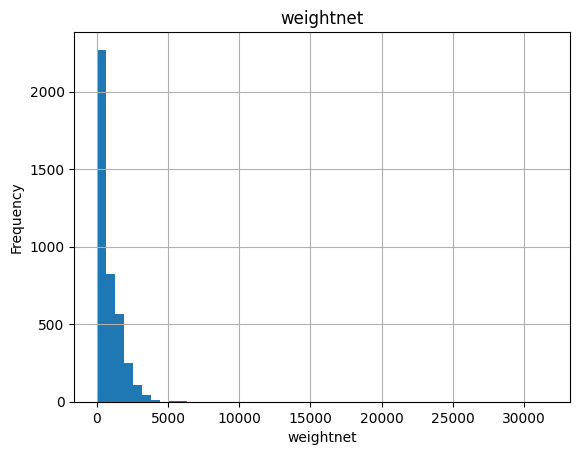

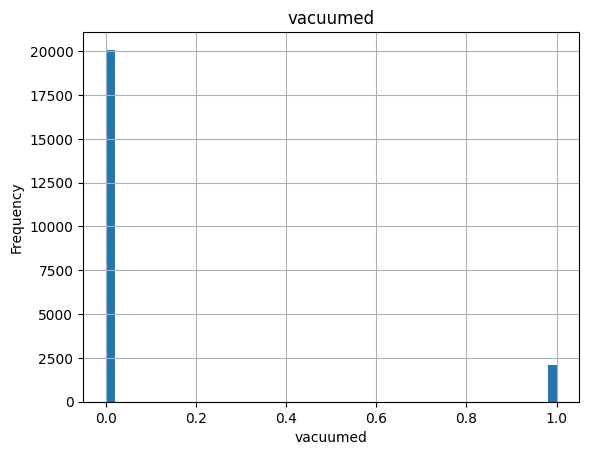

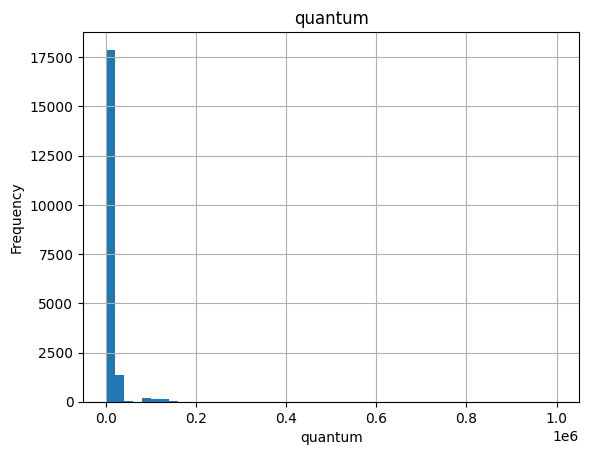

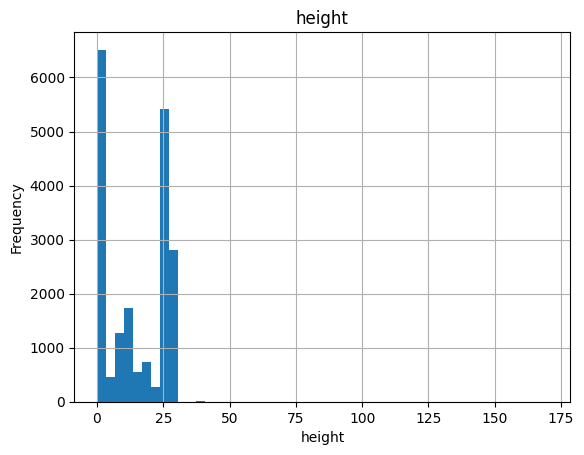

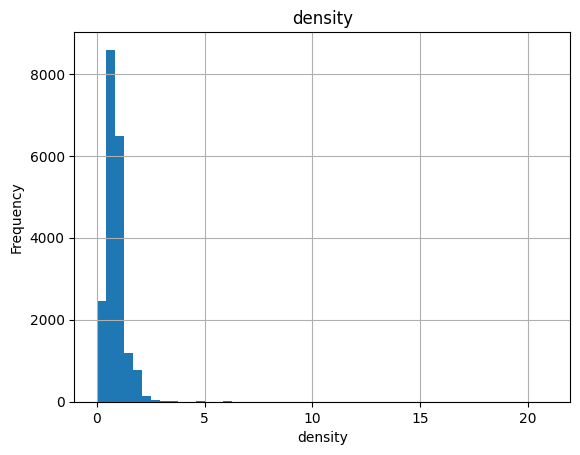

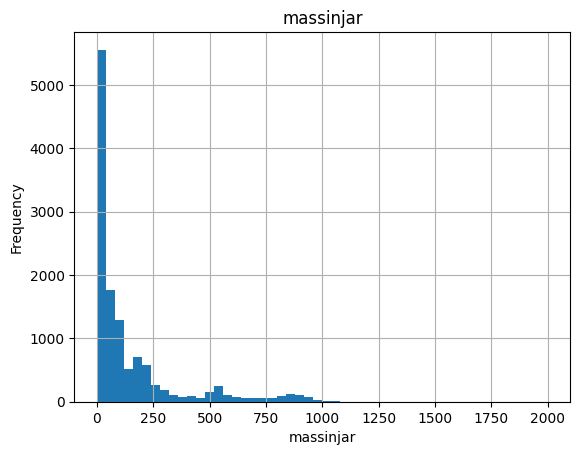

In [42]:
import matplotlib.pyplot as plt

numeric_cols = d1.select_dtypes(include=["number"]).columns

# Plot first 6 numeric variables
for col in numeric_cols[:6]:
    plt.figure()
    d1[col].hist(bins=50)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


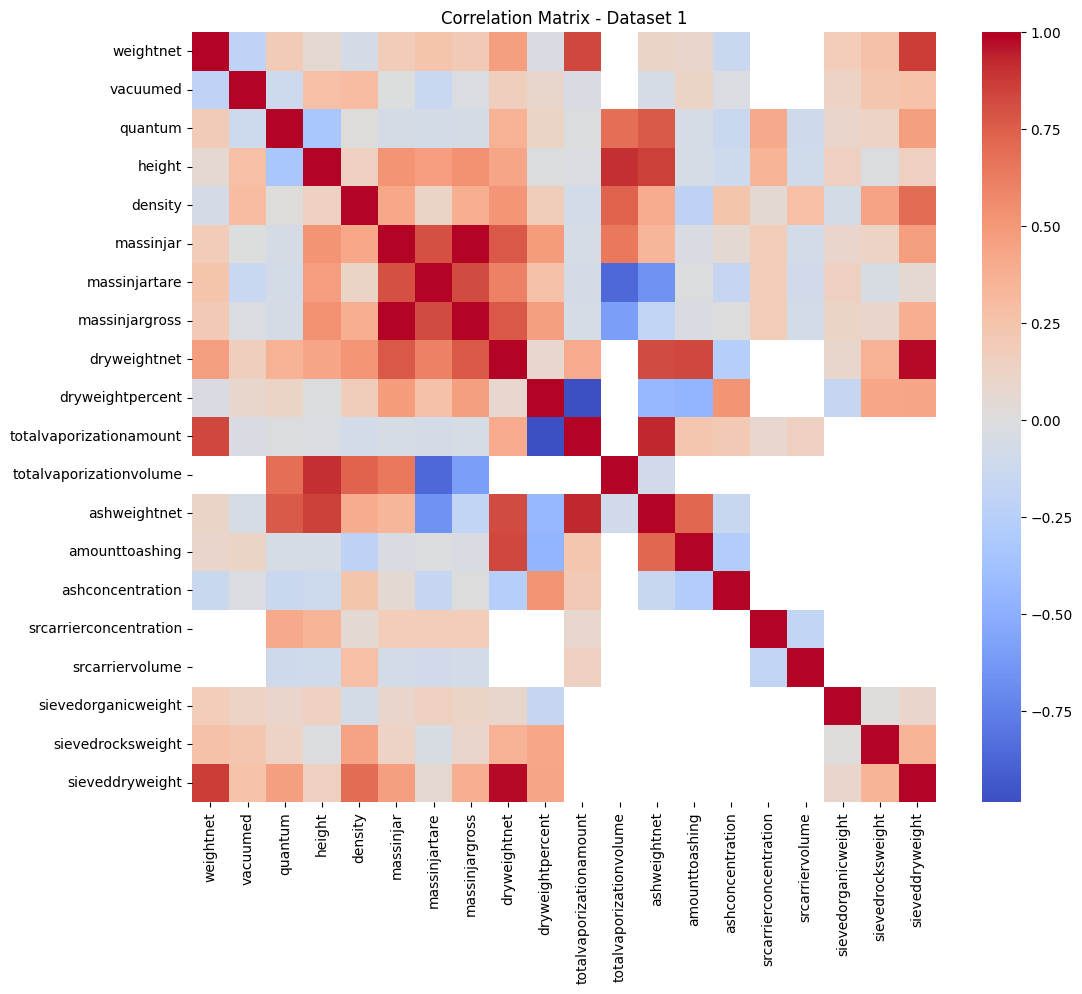

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_d1 = d1.select_dtypes(include=["number"])

corr = numeric_d1.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix - Dataset 1")
plt.show()


In [44]:
# moisture_ratio = 1 - dryWeightPercent/100
if "dryweightpercent" in d1.columns:
    d1["moisture_ratio"] = 1 - (d1["dryweightpercent"] / 100)

# ash_to_dry = ashWeightNet / dryWeightNet
if all(c in d1.columns for c in ["ashweightnet", "dryweightnet"]):
    d1["ash_to_dry"] = d1["ashweightnet"] / d1["dryweightnet"]

# jar_check_error = massInJarGross - (massInJarTare + massInJar)
if all(c in d1.columns for c in ["massinjargross", "massinjartare", "massinjar"]):
    d1["jar_check_error"] = (
        d1["massinjargross"] - 
        (d1["massinjartare"] + d1["massinjar"])
    )


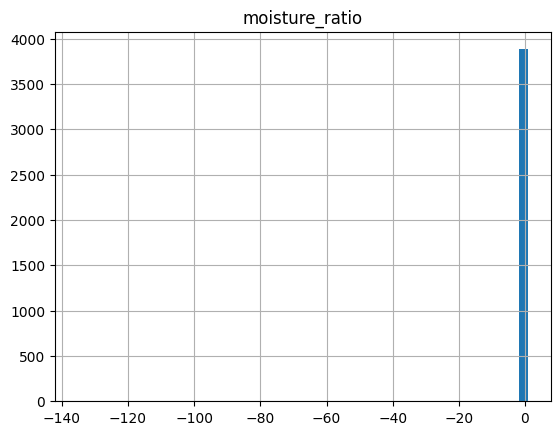

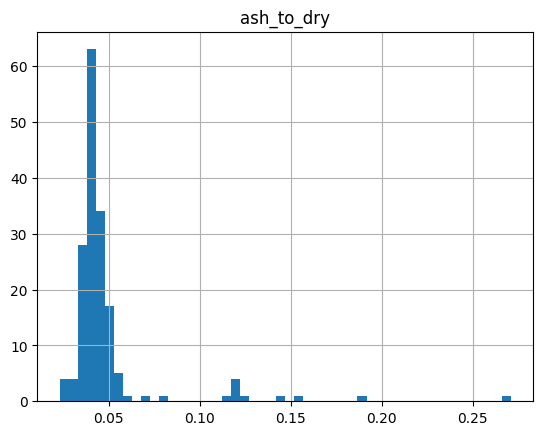

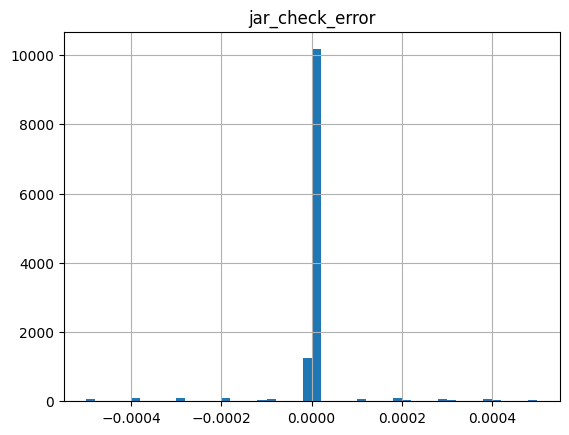

In [45]:
derived_cols = ["moisture_ratio", "ash_to_dry", "jar_check_error"]

for col in derived_cols:
    if col in d1.columns:
        plt.figure()
        d1[col].hist(bins=50)
        plt.title(col)
        plt.show()


In [46]:
features = [
    "weightnet",
    "height",
    "density",
    "massinjar",
    "dryweightnet",
    "ashweightnet",
    "moisture_ratio",
    "ash_to_dry",
    "jar_check_error"
]

# Keep only those that exist
features = [f for f in features if f in d1_clean.columns]

X = d1_clean[features].copy()

# Drop rows where all features are missing
X = X.dropna(how="all")

print("Feature matrix shape:", X.shape)


Feature matrix shape: (19917, 6)


In [47]:
import numpy as np

for col in ["weightnet", "massinjar", "dryweightnet", "ashweightnet"]:
    if col in X.columns:
        X[col] = np.log1p(X[col])


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1) Impute missing values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# 2) Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3) KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 4) Save cluster labels back
d1_clean.loc[X.index, "cluster"] = clusters

print(d1_clean["cluster"].value_counts())


cluster
0.0    10467
3.0     6581
2.0     2206
1.0      663
Name: count, dtype: int64


/var/folders/zc/2tfcymgx7tdbmn9w3ld9_hgh0000gn/T/ipykernel_40198/18373826.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1_clean.loc[X.index, "cluster"] = clusters


In [51]:
cluster_summary = d1_clean.groupby("cluster")[features].mean()
display(cluster_summary)


,weightnet,height,density,massinjar,dryweightnet,ashweightnet
cluster,,,,,,
0.0,1394.326525,4.931979,0.737256,16.501235,96.142857,15.196590
1.0,106.133481,19.648551,0.739069,41.184805,37.422987,3.360030
2.0,1152.255358,26.867787,1.689291,390.291831,788.821373,16.126667
3.0,801.065971,26.421101,0.752204,151.763707,137.908372,31.210036


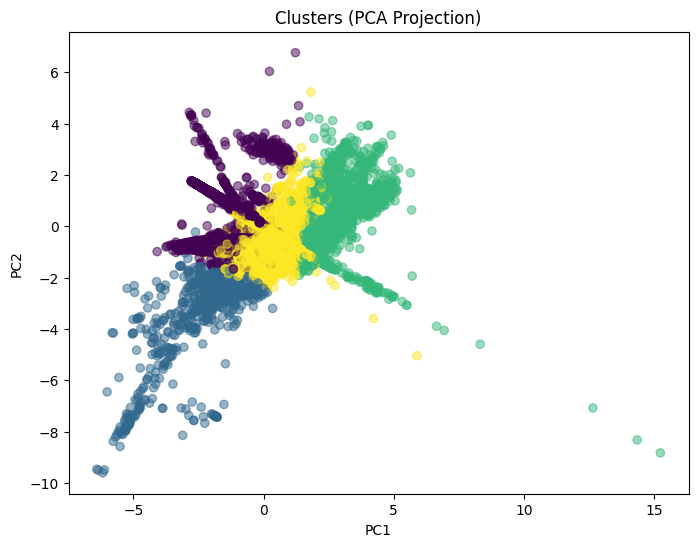

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, alpha=0.5)
plt.title("Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [53]:
cluster_summary = d1_clean.groupby("cluster")[features].mean()
display(cluster_summary)


,weightnet,height,density,massinjar,dryweightnet,ashweightnet
cluster,,,,,,
0.0,1394.326525,4.931979,0.737256,16.501235,96.142857,15.196590
1.0,106.133481,19.648551,0.739069,41.184805,37.422987,3.360030
2.0,1152.255358,26.867787,1.689291,390.291831,788.821373,16.126667
3.0,801.065971,26.421101,0.752204,151.763707,137.908372,31.210036


In [54]:
print(d1_clean["cluster"].value_counts())


cluster
0.0    10467
3.0     6581
2.0     2206
1.0      663
Name: count, dtype: int64
